In [ ]:
# Import the pandas library, our main tool for working with data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the data folder
# The '../' means 'go up one level' from the notebooks folder to the main project folder
df = pd.read_csv('../data/kidney_stone_urine_analysis_extended.csv')

# Display the first 5 rows to see what it looks like
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [14]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


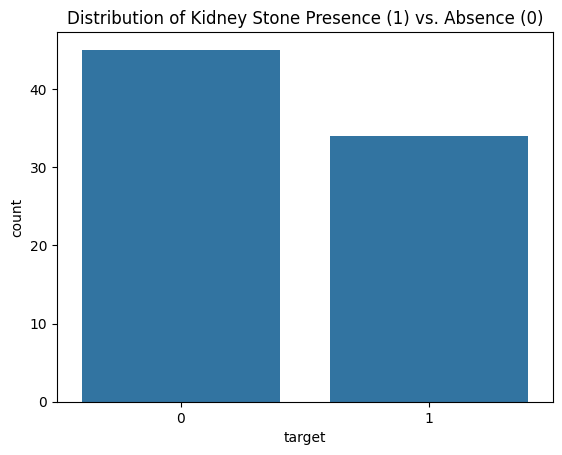

In [15]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Kidney Stone Presence (1) vs. Absence (0)')
plt.show()

In [16]:
# X gets all columns EXCEPT the 'target' column
X = df.drop('target', axis=1)

# y gets ONLY the 'target' column
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a dictionary to hold our models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [19]:
for name, model in models.items():
    # Train the model
    print(f"--- Training {name} ---")
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate and print the results
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print("\n")

--- Training Logistic Regression ---
Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.33      0.40      0.36         5

    accuracy                           0.56        16
   macro avg       0.52      0.52      0.52        16
weighted avg       0.59      0.56      0.57        16



--- Training Random Forest ---


c:\Users\Sharath\kidney_stone_project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.75      0.60      0.67         5

    accuracy                           0.81        16
   macro avg       0.79      0.75      0.77        16
weighted avg       0.81      0.81      0.81        16



--- Training XGBoost ---
Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.40      0.40      0.40         5

    accuracy                           0.62        16
   macro avg       0.56      0.56      0.56        16
weighted avg       0.62      0.62      0.62        16





c:\Users\Sharath\kidney_stone_project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:15:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
# ADD THIS NEW CODE BLOCK
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the SAME scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [21]:
# MODIFY YOUR EXISTING LOOP LIKE THIS

for name, model in models.items():
    # Add max_iter for Logistic Regression
    if name == "Logistic Regression":
        model.set_params(max_iter=1000)

    print(f"--- Training {name} ---")
    # Use the SCALED data to fit the model
    model.fit(X_train_scaled, y_train)

    # Use the SCALED data for predictions
    y_pred = model.predict(X_test_scaled)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print("\n")
    

--- Training Logistic Regression ---
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.50      0.60      0.55         5

    accuracy                           0.69        16
   macro avg       0.65      0.66      0.65        16
weighted avg       0.71      0.69      0.69        16



--- Training Random Forest ---
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.75      0.60      0.67         5

    accuracy                           0.81        16
   macro avg       0.79      0.75      0.77        16
weighted avg       0.81      0.81      0.81        16



--- Training XGBoost ---
Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.40      0.40      0.40         5

    accuracy                           0

c:\Users\Sharath\kidney_stone_project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:24:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [22]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# --- FINAL MODEL SELECTION ---
# We have chosen Random Forest as our champion based on the evaluation results.

# 1. Create an instance of the final model with the same settings
final_model = RandomForestClassifier(random_state=42)

# 2. Train it on ALL the available data to make it as smart as possible
final_model.fit(X, y) # Notice we use the original X and y, not the split data

# 3. Save the fully trained model to the 'models' folder
joblib.dump(final_model, '../models/kidney_stone_model.joblib')

print("🎉 Champion model (Random Forest) saved successfully as 'kidney_stone_model.joblib'!")

🎉 Champion model (Random Forest) saved successfully as 'kidney_stone_model.joblib'!
